# Plots

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

## Download from Atlas and Load

In [2]:
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import *

ens_codes = [
    Ensemble('PED00156e001', database='ped'),
    Ensemble('PED00423e001', database='ped')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/ped'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.load_trajectories()

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory already exists for ensemble PED00156e001. Loading trajectory.
Ensemble PED00423e001 already downloaded. Skipping.
File PED00423e001.pdb already exists. Skipping extraction.
Trajectory already exists for ensemble PED00423e001. Loading trajectory.
Loading trajectory for PED00156e001...
Loading trajectory for PED00423e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x1fadbf0bf70>,
 'PED00423e001': <mdtraj.Trajectory with 1000 frames, 1374 atoms, 92 residues, without unitcells at 0x1fadc11be50>}

In [3]:
vis = Visualization(analysis=analysis)

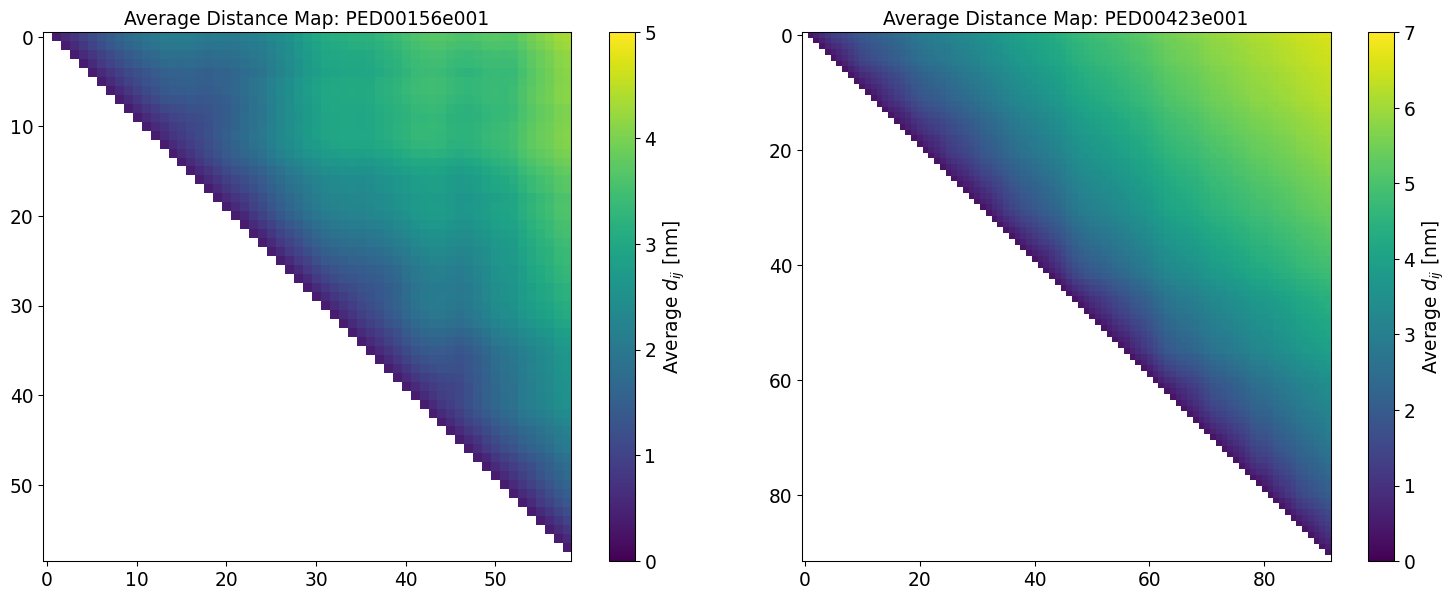

array([[<Axes: title={'center': 'Average Distance Map: PED00156e001'}>,
        <Axes: title={'center': 'Average Distance Map: PED00423e001'}>],
       [<Axes: >, <Axes: >]], dtype=object)

In [4]:
vis.average_dmap_comp()

<Axes: title={'center': 'End-to-End distances distribution'}, ylabel='End-to-End distance [nm]'>

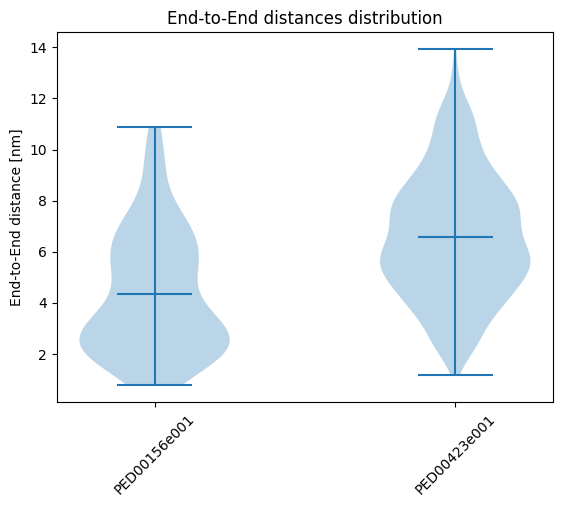

In [5]:
vis.end_to_end_dist(bins=50, violin_plot=True, median=False, means=True)

<Axes: title={'center': 'Asphericity distribution'}, ylabel='Asphericity'>

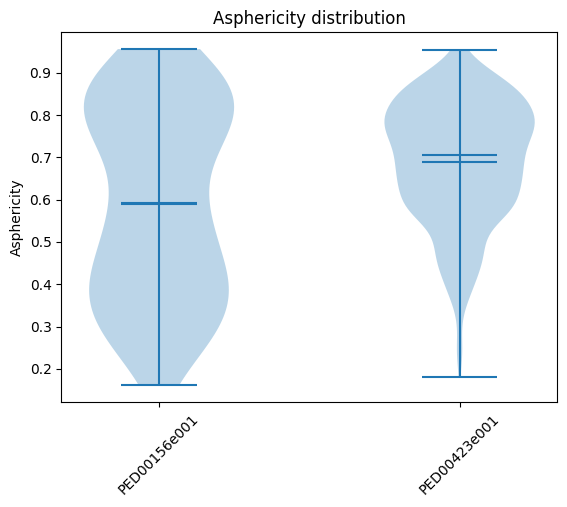

In [6]:
vis.asphericity_dist(bins=10, violin_plot=True)

Pearson coeff for PED00156e001 = 0.892
Pearson coeff for PED00423e001 = 0.767


<Axes: xlabel='Rg [nm]', ylabel='Asphericity'>

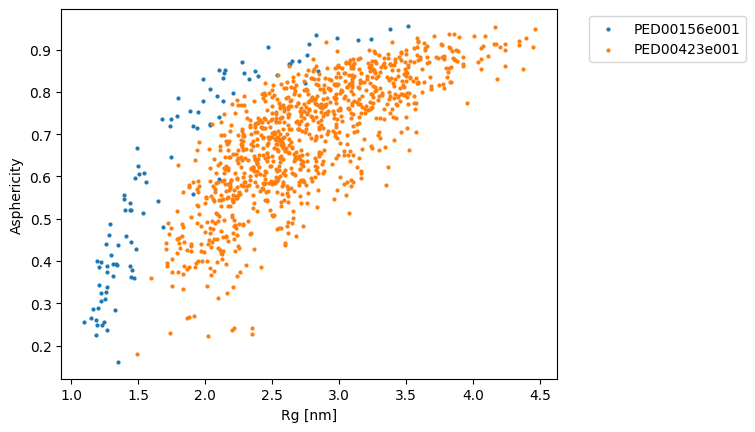

In [7]:
vis.rg_vs_asphericity()

<Axes: title={'center': 'Prolateness distribution'}, ylabel='Prolateness'>

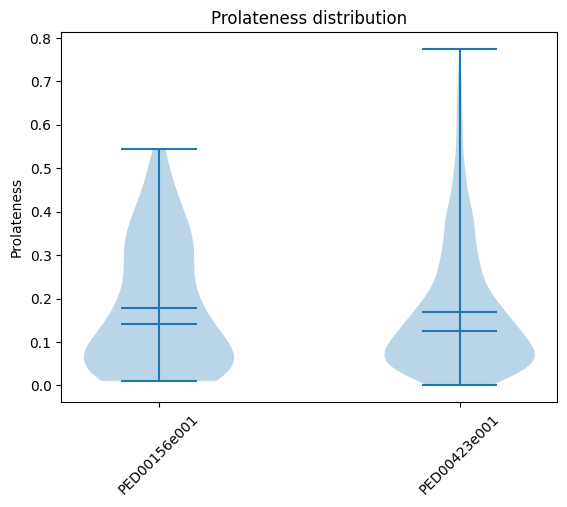

In [8]:
vis.prolateness_dist(bins=10, violin_plot=True, median=True, mean=True)

Pearson coeff for PED00156e001 = -0.624
Pearson coeff for PED00423e001 = -0.403


<Axes: xlabel='Rg [nm]', ylabel='Prolateness'>

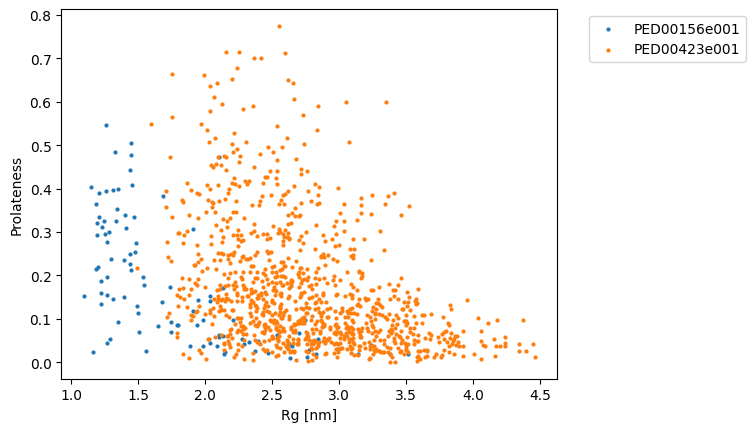

In [9]:
vis.rg_vs_prolateness()

<Axes: title={'center': 'Distribution of alpha angles'}>

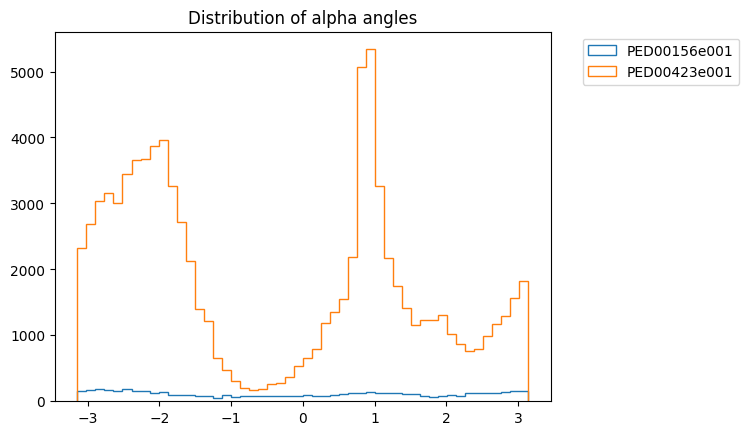

In [10]:
vis.alpha_angles_dist()

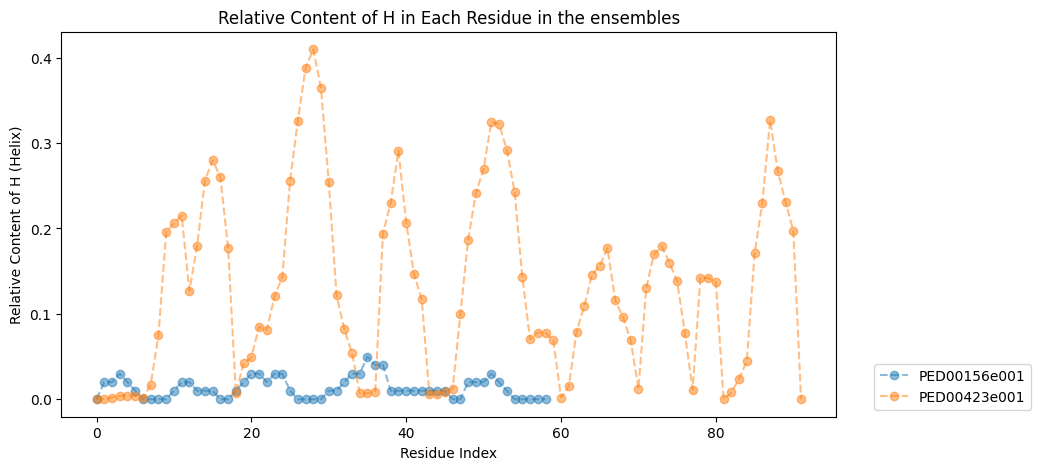

<Axes: title={'center': 'Relative Content of H in Each Residue in the ensembles'}, xlabel='Residue Index', ylabel='Relative Content of H (Helix)'>

In [11]:
vis.relative_helix_content()

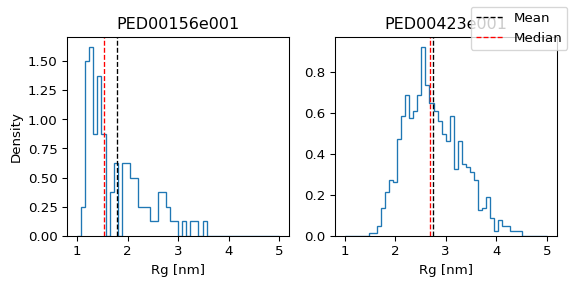

array([<Axes: title={'center': 'PED00156e001'}, xlabel='Rg [nm]', ylabel='Density'>,
       <Axes: title={'center': 'PED00423e001'}, xlabel='Rg [nm]'>],
      dtype=object)

In [12]:
vis.rg_comp_dist()

In [13]:
#vis.contact_prob_map(threshold=0.8, min_sep=4, cmap_color='Blues', norm=True)

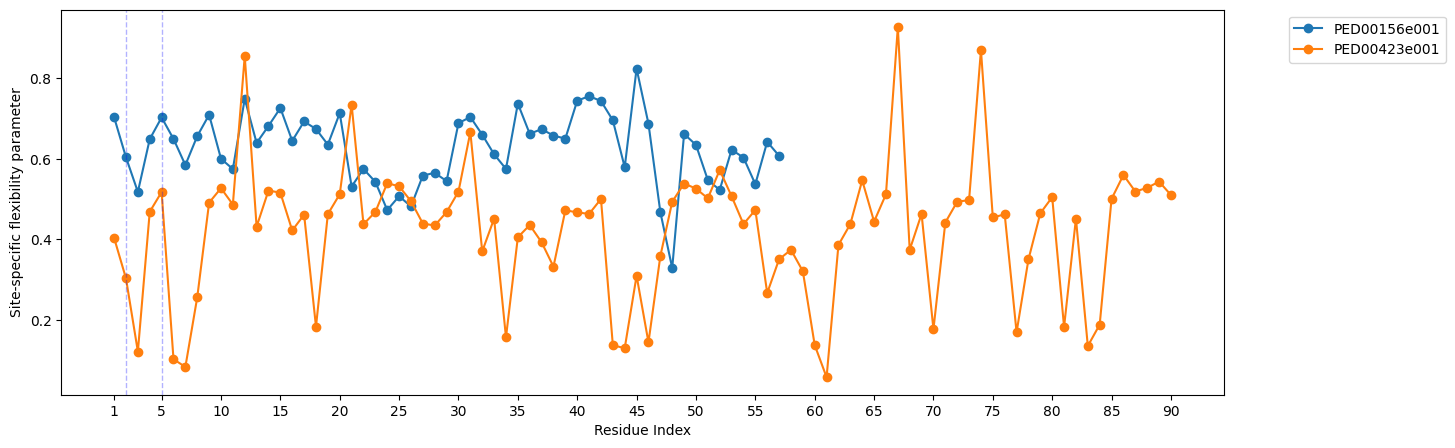

<Axes: xlabel='Residue Index', ylabel='Site-specific flexibility parameter'>

In [14]:
vis.ss_flexibility_parameter(pointer=[2,5])

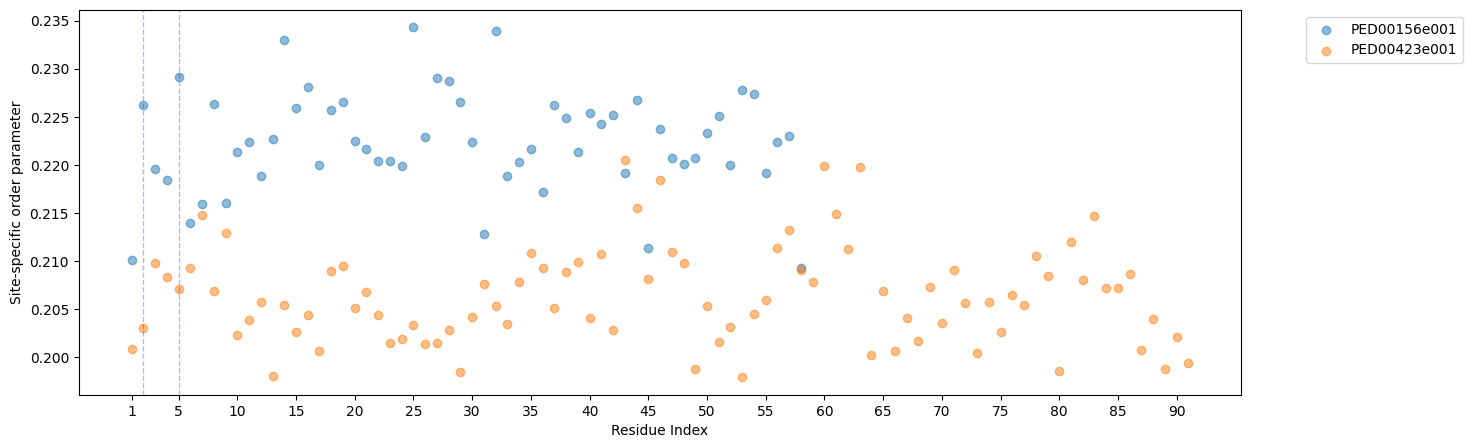

<Axes: xlabel='Residue Index', ylabel='Site-specific order parameter'>

In [15]:
vis.ss_order_parameter(pointer=[5,2])

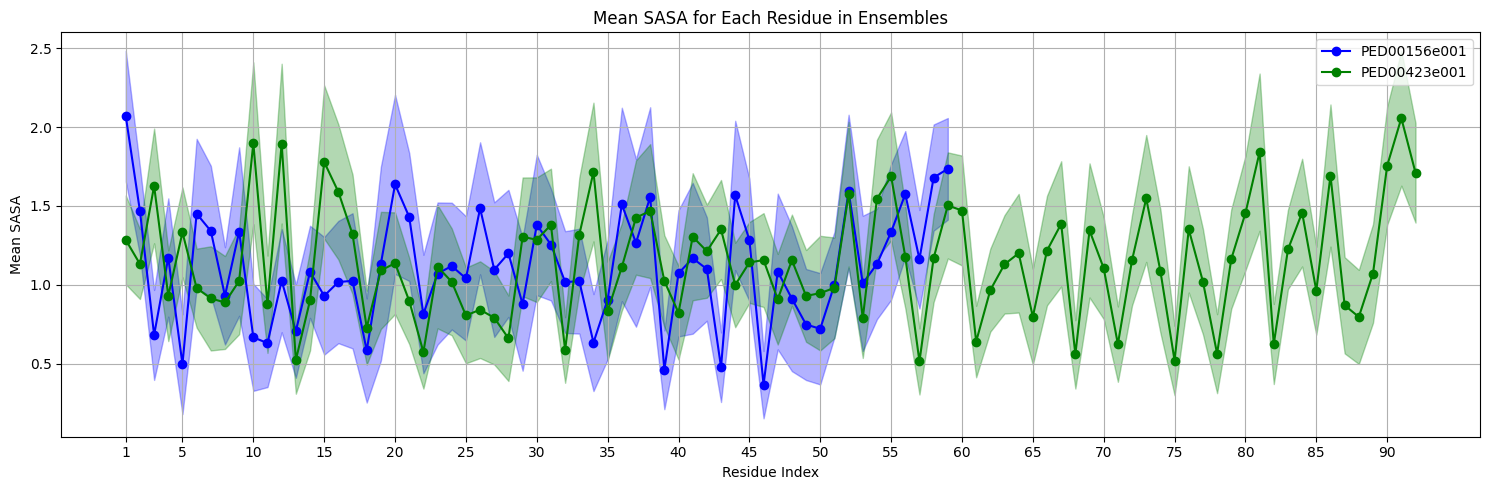

<Axes: title={'center': 'Mean SASA for Each Residue in Ensembles'}, xlabel='Residue Index', ylabel='Mean SASA'>

In [16]:
vis.local_sasa_dist()

# Ensemble: PED00156e001
features: (100, 1653)
distance matrix: (59, 59)


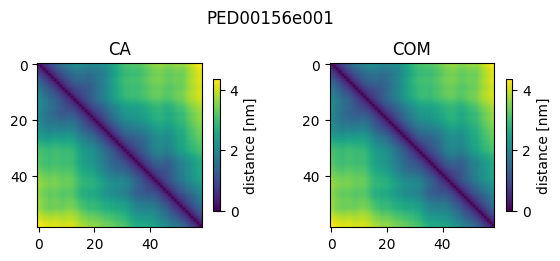

# Ensemble: PED00423e001
features: (1000, 4095)
distance matrix: (92, 92)


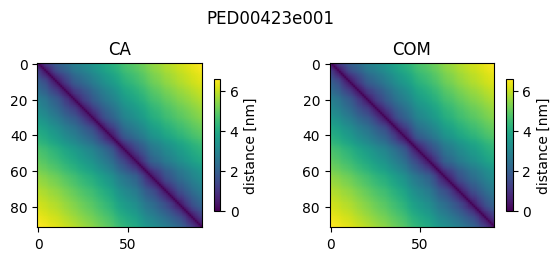

[[<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>],
 [<Axes: title={'center': 'CA'}>, <Axes: title={'center': 'COM'}>]]

In [17]:
vis.ca_com_dist(min_sep=2)

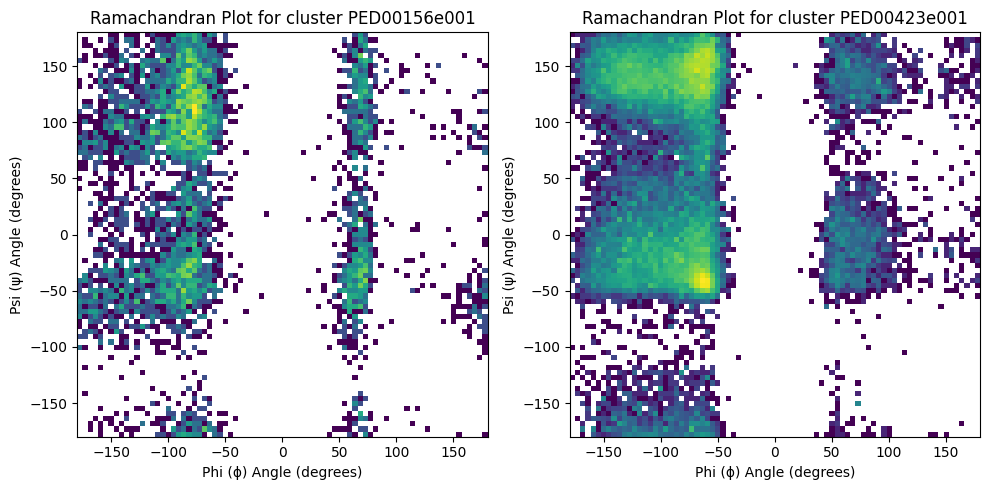

array([<Axes: title={'center': 'Ramachandran Plot for cluster PED00156e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>,
       <Axes: title={'center': 'Ramachandran Plot for cluster PED00423e001'}, xlabel='Phi (ϕ) Angle (degrees)', ylabel='Psi (ψ) Angle (degrees)'>],
      dtype=object)

In [18]:
vis.ramachandran()

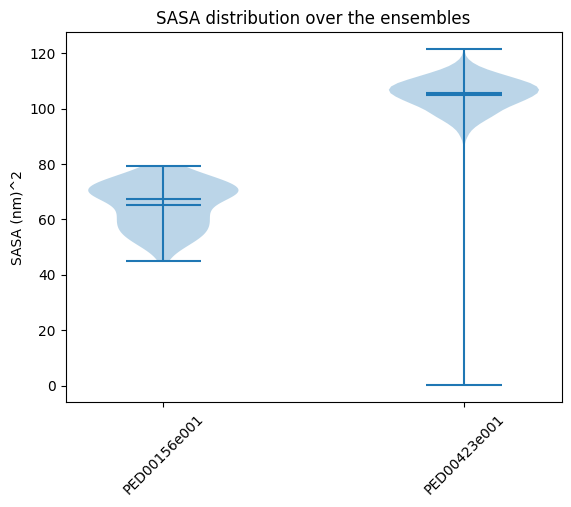

In [19]:
ax_ =vis.global_sasa_dist()